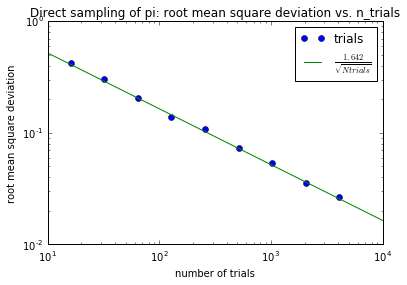

In [14]:
%matplotlib inline
import matplotlib as mpl
mpl.use('Agg')
import random, math, pylab

def direct_pi(N):
    n_hits = 0
    for i in range(N):
        x, y = random.uniform(-1.0, 1.0), random.uniform(-1.0, 1.0)
        if x ** 2 + y ** 2 < 1.0:
            n_hits += 1
    return n_hits

n_runs = 500
n_trials_list = []
sigmasqs = []
for poweroftwo in range(4, 13):
    n_trials = 2 ** poweroftwo
    sigmasq = 0.0
    for run in range(n_runs):
        pi_est = 4.0 * direct_pi(n_trials) / float(n_trials)
        sigmasq += (pi_est - math.pi) ** 2
    sigmasqs.append(math.sqrt(sigmasq/(n_runs)))
    n_trials_list.append(n_trials)

pylab.plot(n_trials_list, sigmasqs, 'o', label='trials')
pylab.plot([10.0, 10000.0], [1.642 / math.sqrt(10.0), 1.642 / math.sqrt(10000.0)],
          label=r'$\frac{1.642}{\sqrt{Ntrials}}$')
pylab.xscale('log')
pylab.yscale('log')
pylab.xlabel('number of trials')
pylab.ylabel('root mean square deviation')
pylab.legend()
pylab.title('Direct sampling of pi: root mean square deviation vs. n_trials')
pylab.savefig('direct_sampling_rms_deviation-with-fit.png')
pylab.show()